Import libraries
---

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

---
Random draw
---

In [2]:
def last_paper():
    hat = np.arange(1,2025)
    while len(hat) > 1:
        ind1 = random.randint(0,len(hat)-1)
        num1 = hat[ind1]
        hat = np.delete(hat,ind1)
        ind2 = random.randint(0,len(hat)-1)
        num2 = hat[ind2]
        hat = np.delete(hat,ind2)
        hat = np.append(hat,np.abs(num2 - num1))
    return hat[0]

In [3]:
final_papers = []
for i in tqdm(range(1000)):
    final_papers.append(last_paper())

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 32.85it/s]


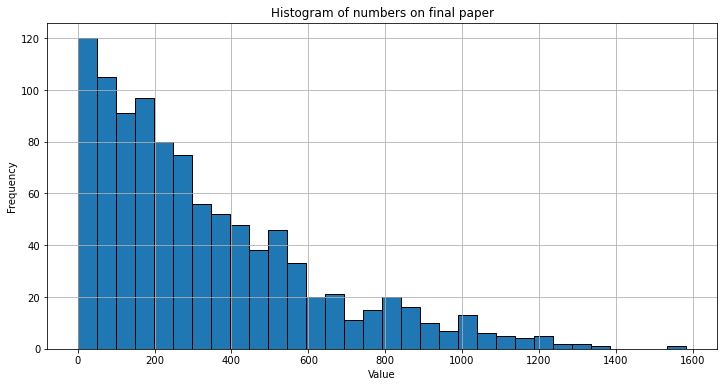

In [4]:
plt.figure(figsize=(12,6))
plt.hist(final_papers,bins = 32, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of numbers on final paper')
plt.grid(True)
plt.show()

---
Brute force
---

In [5]:
def perm(arr):
    results = []
    if len(arr) == 2:
        results.append(np.abs(arr[1] - arr[0]))
    else:
        for i in range(len(arr)-1):
            for j in range(i+1,len(arr)):
                new = np.abs(arr[i] - arr[j])
                temp_arr = np.delete(arr,[i,j])
                temp_arr = np.append(temp_arr,new)
                results.extend(perm(temp_arr))
    return results

In [6]:
output_array = perm(np.arange(1,4))
print(output_array)

[2, 0, 0]


In [7]:
for i in range(3,10):
    output_array = perm(np.arange(1,i))
    print(f'For n = {i-1}, there are {len(output_array)} possibilities')

For n = 2, there are 1 possibilities
For n = 3, there are 3 possibilities
For n = 4, there are 18 possibilities
For n = 5, there are 180 possibilities
For n = 6, there are 2700 possibilities
For n = 7, there are 56700 possibilities
For n = 8, there are 1587600 possibilities


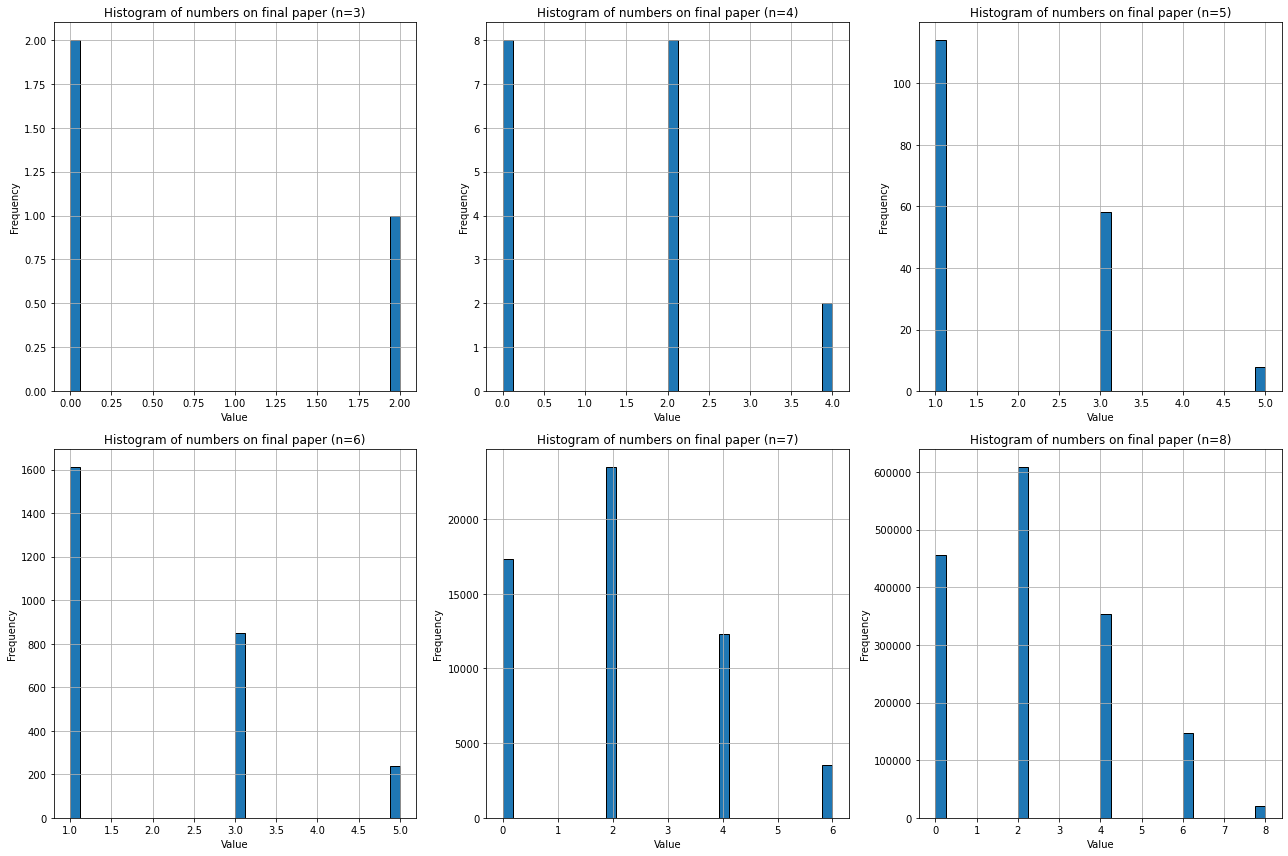

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for i, ax in zip(range(4, 10), axs.flat):
    ax.hist(perm(np.arange(1,i)), bins=32, edgecolor='black')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of numbers on final paper (n={i-1})')
    ax.grid(True)

plt.tight_layout()
plt.show()